In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
if sys.platform == 'darwin' :
    print(" Mac OS ")
else :
    print(' Windows ')

 Mac OS 


## 상장기업 정보 가져오기

## 모듈 import 하기

In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.2'

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

#plt.rcParams["font.family"] =  "Malgun Gothic"
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [8]:
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [9]:
help(fdr.DataReader)

Help on function DataReader in module FinanceDataReader.data:

DataReader(symbol, start=None, end=None, country=None)



## 특정 년도 이후 

In [10]:
df = fdr.DataReader('215600', '2017')

In [11]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,13250,13250,12900,12950,497396,-0.022642
2017-01-03,13000,13150,12700,12750,540369,-0.015444
2017-01-04,12800,12900,12650,12850,399112,0.007843
2017-01-05,12950,13550,12800,13200,1159516,0.027237
2017-01-06,13250,13250,12950,13050,385308,-0.011364


In [12]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-05-03,63800,65100,63300,63800,421160,0.000000
2019-05-07,63000,63500,62700,62700,414906,-0.017241
2019-05-08,62000,65200,60300,61000,1625296,-0.027113
2019-05-09,60900,61500,57700,57800,1237743,-0.052459
2019-05-10,57500,59000,56300,57400,861478,-0.006920


## 신라젠, 2017년~현재 종가별 흐름 그래프 그리기

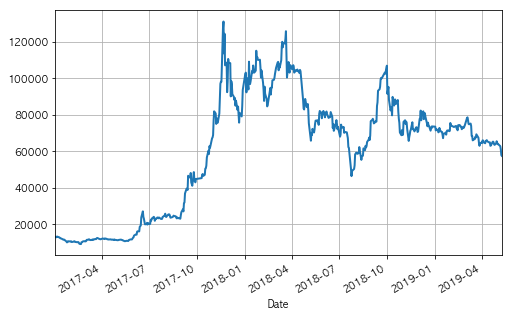

In [13]:
df['Close'].plot(figsize=(8,5))

## 셀트리온 헬스케어

In [14]:
df_1 = fdr.DataReader('091990', '2017')

In [15]:
df_2 = df_1.copy()

In [16]:
df_1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926
2017-08-01,48994,50438,47262,49380,3611026,0.031156
2017-08-02,48898,50246,48127,49091,2495045,-0.005853
2017-08-03,48609,49764,46876,49669,3930618,0.011774


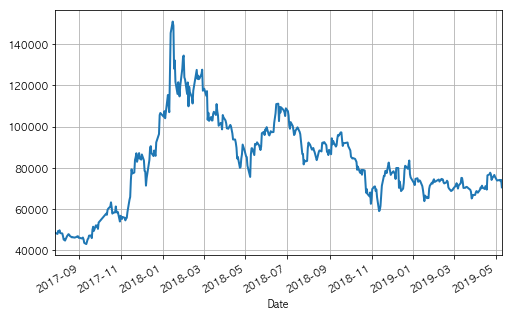

In [17]:
df_1['Close'].plot(figsize=(8,5))

### 이동평균 구하기

In [18]:
df_1['20d'] = np.round(df_1["Close"].rolling(window=42).mean(), 2)

In [19]:
df_1.head()

,Open,High,Low,Close,Volume,Change,20d
Date,,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926,NaN
2017-08-01,48994,50438,47262,49380,3611026,0.031156,NaN
2017-08-02,48898,50246,48127,49091,2495045,-0.005853,NaN
2017-08-03,48609,49764,46876,49669,3930618,0.011774,NaN


In [20]:
df_1['60d'] = np.round(df_1["Close"].rolling(window= 60).mean(), 2)

In [21]:
df_1['120d'] = np.round(df_1["Close"].rolling(window=120).mean(), 2)

In [22]:
df_1.head()

,Open,High,Low,Close,Volume,Change,20d,60d,120d
Date,,,,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN,NaN,NaN,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926,NaN,NaN,NaN
2017-08-01,48994,50438,47262,49380,3611026,0.031156,NaN,NaN,NaN
2017-08-02,48898,50246,48127,49091,2495045,-0.005853,NaN,NaN,NaN
2017-08-03,48609,49764,46876,49669,3930618,0.011774,NaN,NaN,NaN


## 추세선에 따른 주식 매수, 보호, 매도

   20일선과 60일선이 120 선가 근접... 위로 올라가면 매수 신호

In [23]:
df_1['20-120'] = df_1['20d'] - df_1['120d']

In [24]:
df_1['20-120'].tail()

Date
2019-05-03    -955.38
2019-05-07    -929.08
2019-05-08    -876.95
2019-05-09    -882.34
2019-05-10   -1026.05
Name: 20-120, dtype: float64

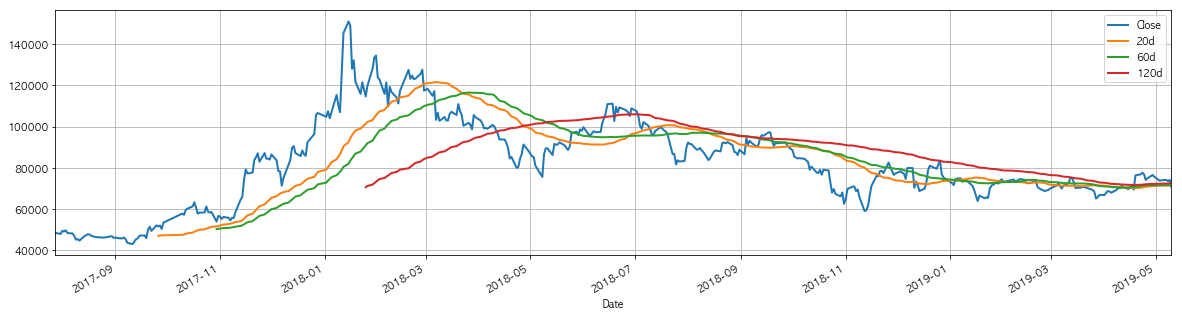

In [25]:
df_1[['Close','20d','60d','120d']].plot(figsize=(20,5))

## 특정 임계값을 지정

In [26]:
SD = 50

In [27]:
df_1['매매구간'] = np.where(df_1['20-120']> SD,1,0)

In [28]:
df_1['매매구간'] = np.where(df_1['20-120'] < -SD, -1, df_1['매매구간'])

In [29]:
df_1['매매구간'].value_counts()

-1    251
 0    119
 1     63
Name: 매매구간, dtype: int64

## 매매영역 시각화

(-1.1, 1.1)

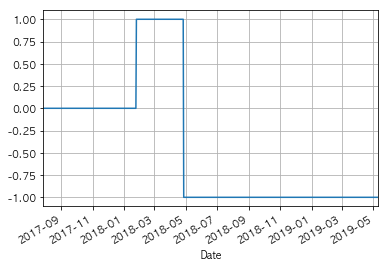

In [30]:
df_1['매매구간'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

## 로그 수익률 구하기 : 하루를 지연시켜서 일간 로그 수익률 계산

In [31]:
df_1['시장'] = np.log(df_1['Close'] / df_1['Close'].shift(1))

## 전략 수익률은 매매구간 열의 자료를 하루 지연시키고 시장수익율과 곱한다

In [32]:
df_1['전략'] = df_1['매매구간'].shift(1) *  df_1['시장']

## 매매에 대한 전략을 구성할 수 있다.

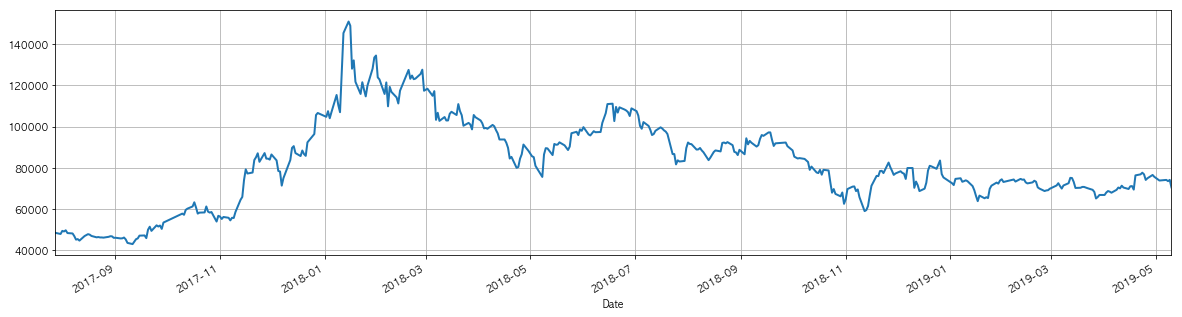

In [33]:
df_1['Close'].plot(figsize=(20,5))

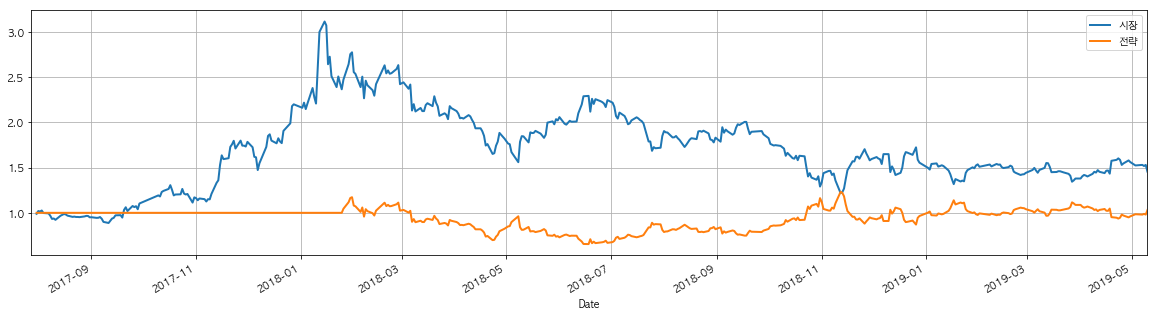

In [34]:
df_1[['시장','전략']].cumsum().apply(np.exp).plot(figsize=(20,5))

## 두 주식의 종가를 비교하기

In [35]:
df_3 = pd.merge(df,df_2, left_index=True, right_index=True)

In [36]:
df_3.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Change_x,Open_y,High_y,Low_y,Close_y,Volume_y,Change_y
Date,,,,,,,,,,,,
2017-07-28,24250,24500,23500,24100,1607694,0.008368,42015,48417,42015,48417,14075726,NaN
2017-07-31,23850,24800,23400,24800,1349443,0.029046,47935,50534,46347,47888,4965563,-0.010926
2017-08-01,24850,26350,24700,25700,3246676,0.036290,48994,50438,47262,49380,3611026,0.031156
2017-08-02,25900,26200,23800,24100,3115525,-0.062257,48898,50246,48127,49091,2495045,-0.005853
2017-08-03,24400,25100,23500,23900,1326922,-0.008299,48609,49764,46876,49669,3930618,0.011774


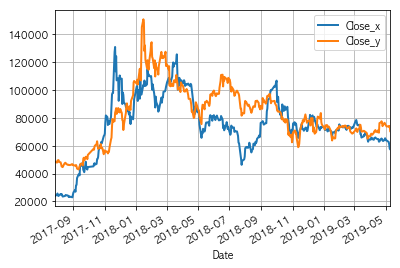

In [37]:
df_3[['Close_x','Close_y']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122fcb518>,
      dtype=object)

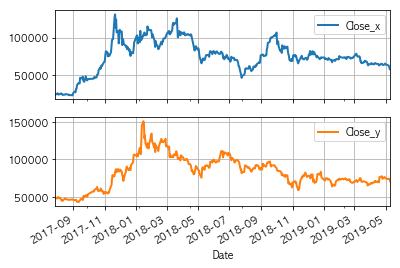

In [38]:
df_3[['Close_x','Close_y']].plot(subplots=True)